In [1]:
import import_ipynb

importing Jupyter notebook from sentiment_analysis.ipynb


<string>:1: FutureWarning: The default value of regex will change from True to False in a future version.
<string>:2: FutureWarning: The default value of regex will change from True to False in a future version.
<string>:3: FutureWarning: The default value of regex will change from True to False in a future version.
100%|███████████████████████████████████████████████████████████████████████████| 48852/48852 [04:51<00:00, 167.70it/s]


단어 집합(vocabulary)의 크기 : 43770
등장 빈도가 9번 이하인 희귀 단어의 수: 34608
단어 집합에서 희귀 단어의 비율: 79.06785469499657
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 4.252908861364179
단어 집합의 크기 : 9163


C:\Users\20191\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


144991
144991
전체 샘플 중 길이가 30 이하인 샘플의 비율: 91.9995034174535
Epoch 1/10
1813/1813 [==============================] - ETA: 0s - loss: 0.4129 - acc: 0.8094
Epoch 1: val_acc improved from -inf to 0.83575, saving model to best_model.h5
1813/1813 [==============================] - 171s 92ms/step - loss: 0.4129 - acc: 0.8094 - val_loss: 0.3805 - val_acc: 0.8358
Epoch 2/10
1812/1813 [============================>.] - ETA: 0s - loss: 0.3493 - acc: 0.8468
Epoch 2: val_acc improved from 0.83575 to 0.84579, saving model to best_model.h5
1813/1813 [==============================] - 155s 86ms/step - loss: 0.3493 - acc: 0.8468 - val_loss: 0.3519 - val_acc: 0.8458
Epoch 3/10
1812/1813 [============================>.] - ETA: 0s - loss: 0.3244 - acc: 0.8597
Epoch 3: val_acc improved from 0.84579 to 0.85127, saving model to best_model.h5
1813/1813 [==============================] - 212s 117ms/step - loss: 0.3244 - acc: 0.8597 - val_loss: 0.3394 - val_acc: 0.8513
Epoch 4/10
1812/1813 [======================

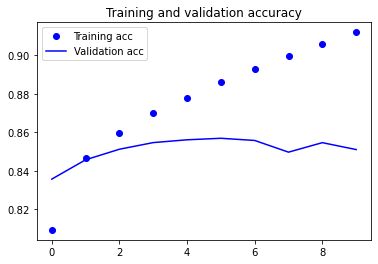

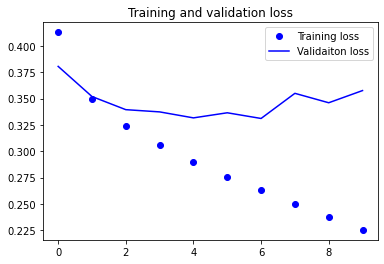

In [2]:
from sentiment_analysis import sentiment_predict

In [4]:
from tqdm import tqdm
import pandas as pd
import os
BASE_DIR = os.getcwd()

In [5]:
movie_data = pd.read_csv(BASE_DIR + '/crawling/samples2.csv')

In [6]:
movie_data

,movie,sentence,score
0,올빼미,연출과 연기 그리고 스토리까지 삼박자가 조화롭다,8
1,데시벨,개봉 전에 안좋은 여론몰이 때문에 너무 손해를 본 영화,7
2,올빼미,진짜 눈을 뗄수없을만큼 재밌었어요,10
3,동감,원작의 감동은 어디가고 유치함만 남았다,5
4,레지던트 이블: 파멸의 날,볼 것만 많았다.. 볼거리만..,6
...,...,...,...
9406,동감,원작 동감을 재미있게 봐서리메이크 버전도 봤어요.원작이 낫다는 평이 있어서 걱정했는...,10
9407,"오늘 밤, 세계에서 이 사랑이 사라진다 해도",처음부터 끝까지 웃고 울었다일본 특유 느낌이 잘 살려있어서 더 이입할 수 있었고 여...,8
9408,양자경의 더 모든 날 모든 순간,얼마전 확장판으로 봤는데영화 중반까지 내내 주성치영화를 보는듯한 기시감과엉성한 멀티...,6
9409,탄생,감동적입니다 최고에요^^,10


In [7]:
reviews = movie_data.groupby('movie', as_index=False).agg(reviews=('sentence', 'unique'), people=('sentence', 'count'))

In [8]:
reviews

,movie,reviews,people
0,#살아있다,[코로나 명예사 수혜를 입은 대표적인 영화 중 하나],1
1,007 골드핑거,[시리즈다운 007 시리즈],1
2,007 골든 아이,"[007 시리즈 중 최강 중 하나라고 생각되는 작품으로 탱크씬, 위성씬에 무엇보다 ...",1
3,007 노 타임 투 다이,"[보다가 졸았음.. 다시 관람해야하는데 엄두가 안남ㅜㅜ, 다니엘 크레이그의 마지막 ...",3
4,007 문레이커,[79년당시ㅡ007시리즈ㅡ3번째로ㅡㅡ전세계흥행1위햇죠ㅡ],1
...,...,...,...
1172,후궁 : 제왕의 첩,[의상이나 분위기 자체가 중국 영화인줄! 무엇보다 대비가 권력이 아무리 쎄다한들 왕...,1
1173,후쿠오카,"[제작비를 좀 더 썼어야 했는데..예산에다 스토리, 배경 및 판타지적 설정까지 끼워...",2
1174,후회하지 않아,"[무언가 화두를 던진 다는 것, 그것만으로도 영화는 성공 한 것]",1
1175,히트,"[화려한 액션은 차치하고, 전체적으로 형사가 범죄자를 쫓는 지극히 평범한 이야기임에...",1


In [9]:
#긍정 +1, 부정 -1
empty = []
for i in tqdm(range(len(reviews))):
    pos_neg = ''
    score = 0
    count = 0
    for j in range(len(reviews.reviews[i])):
        if len(reviews.reviews[i]) <= 3:
            continue
        pos_neg = sentiment_predict(reviews.reviews[i][j])
        if '긍정' in pos_neg:
            score += 1
            count += 1
        elif '부정' in pos_neg: 
            score -= 1
            count += 1
        else:
            continue
#     print(reviews.movie[i], score/len(reviews.reviews[i]))
    if count == 0:
        continue
    empty.append((reviews.movie[i], score/count, count))

  0%|                                                                                         | 0/1177 [00:00<?, ?it/s]

1/1 [==============================] - 0s 34ms/step


  1%|█                                                                               | 15/1177 [00:02<03:06,  6.23it/s]

1/1 [==============================] - 0s 26ms/step


  3%|██▍                                                                             | 36/1177 [00:02<01:13, 15.48it/s]

1/1 [==============================] - 0s 31ms/step


  3%|██▋                                                                             | 40/1177 [00:03<01:22, 13.83it/s]

1/1 [==============================] - 0s 33ms/step


  4%|███▎                                                                            | 49/1177 [00:03<01:13, 15.30it/s]

1/1 [==============================] - 0s 30ms/step


  5%|████▏                                                                           | 62/1177 [00:04<01:05, 17.15it/s]

1/1 [==============================] - 0s 28ms/step


  6%|████▍                                                                           | 65/1177 [00:05<01:57,  9.46it/s]

1/1 [==============================] - 0s 33ms/step


  6%|█████▏                                                                          | 76/1177 [00:07<02:35,  7.07it/s]

1/1 [==============================] - 0s 27ms/step


  8%|██████▋                                                                        | 100/1177 [00:12<03:00,  5.95it/s]

1/1 [==============================] - 0s 27ms/step


  9%|███████▎                                                                       | 109/1177 [00:15<03:46,  4.73it/s]

1/1 [==============================] - 0s 32ms/step


 10%|███████▋                                                                       | 115/1177 [00:16<03:15,  5.43it/s]

1/1 [==============================] - 0s 33ms/step


 10%|████████▎                                                                      | 123/1177 [00:17<03:16,  5.36it/s]

1/1 [==============================] - 0s 24ms/step


 11%|████████▌                                                                      | 127/1177 [00:20<04:27,  3.93it/s]

1/1 [==============================] - 0s 29ms/step


 11%|████████▋                                                                      | 129/1177 [00:20<04:15,  4.10it/s]

1/1 [==============================] - 0s 25ms/step


 11%|████████▊                                                                      | 132/1177 [00:21<04:52,  3.58it/s]

1/1 [==============================] - 0s 28ms/step


 12%|█████████▌                                                                     | 143/1177 [00:22<02:44,  6.28it/s]

1/1 [==============================] - 0s 28ms/step


 12%|█████████▋                                                                     | 145/1177 [00:23<03:47,  4.53it/s]

1/1 [==============================] - 0s 27ms/step


 13%|██████████▏                                                                    | 152/1177 [00:23<02:48,  6.08it/s]

1/1 [==============================] - 0s 25ms/step


 14%|██████████▋                                                                    | 160/1177 [00:24<02:01,  8.34it/s]

1/1 [==============================] - 0s 30ms/step


 14%|██████████▊                                                                    | 162/1177 [00:24<02:05,  8.09it/s]

1/1 [==============================] - 0s 33ms/step


 15%|███████████▌                                                                   | 173/1177 [00:25<01:30, 11.06it/s]

1/1 [==============================] - 0s 31ms/step


 15%|████████████                                                                   | 180/1177 [00:28<03:47,  4.38it/s]

1/1 [==============================] - 0s 28ms/step


 15%|████████████▏                                                                  | 182/1177 [00:29<03:51,  4.30it/s]

1/1 [==============================] - 0s 29ms/step


 16%|████████████▍                                                                  | 186/1177 [00:30<04:11,  3.94it/s]

1/1 [==============================] - 0s 32ms/step


 16%|████████████▊                                                                  | 191/1177 [00:32<04:06,  4.00it/s]

1/1 [==============================] - 0s 24ms/step


 16%|████████████▉                                                                  | 192/1177 [00:32<04:36,  3.56it/s]

1/1 [==============================] - 0s 25ms/step


 17%|█████████████▏                                                                 | 197/1177 [00:35<06:33,  2.49it/s]

1/1 [==============================] - 0s 30ms/step


 18%|██████████████                                                                 | 209/1177 [00:36<03:25,  4.71it/s]

1/1 [==============================] - 0s 26ms/step


 18%|██████████████▍                                                                | 216/1177 [00:37<02:46,  5.78it/s]

1/1 [==============================] - 0s 27ms/step


 19%|███████████████▏                                                               | 227/1177 [00:37<01:47,  8.86it/s]

1/1 [==============================] - 0s 26ms/step


 20%|███████████████▋                                                               | 233/1177 [00:37<01:32, 10.21it/s]

1/1 [==============================] - 0s 43ms/step


 20%|███████████████▋                                                               | 233/1177 [00:50<01:32, 10.21it/s]

1/1 [==============================] - 0s 36ms/step


 21%|████████████████▍                                                              | 244/1177 [00:55<10:36,  1.47it/s]

1/1 [==============================] - 0s 26ms/step


 22%|█████████████████                                                              | 254/1177 [01:05<12:20,  1.25it/s]

1/1 [==============================] - 0s 30ms/step


 22%|█████████████████▍                                                             | 260/1177 [01:06<09:46,  1.56it/s]

1/1 [==============================] - 0s 31ms/step


 22%|█████████████████▌                                                             | 262/1177 [01:06<09:11,  1.66it/s]

1/1 [==============================] - 0s 29ms/step


 25%|███████████████████▌                                                           | 292/1177 [01:06<03:00,  4.91it/s]

1/1 [==============================] - 0s 29ms/step


 26%|████████████████████▏                                                          | 301/1177 [01:07<02:37,  5.57it/s]

1/1 [==============================] - 0s 30ms/step


 27%|█████████████████████▍                                                         | 320/1177 [01:19<05:02,  2.83it/s]

1/1 [==============================] - 0s 35ms/step


 27%|█████████████████████▌                                                         | 321/1177 [01:19<05:05,  2.80it/s]

1/1 [==============================] - 0s 28ms/step


 28%|██████████████████████▏                                                        | 330/1177 [01:20<03:59,  3.54it/s]

1/1 [==============================] - 0s 27ms/step


 29%|██████████████████████▋                                                        | 338/1177 [01:21<03:22,  4.14it/s]

1/1 [==============================] - 0s 30ms/step


 29%|███████████████████████                                                        | 344/1177 [01:23<03:24,  4.07it/s]

1/1 [==============================] - 0s 27ms/step


 32%|█████████████████████████▎                                                     | 377/1177 [01:23<01:23,  9.58it/s]

1/1 [==============================] - 0s 29ms/step


 33%|██████████████████████████▏                                                    | 390/1177 [01:24<01:06, 11.91it/s]

1/1 [==============================] - 0s 25ms/step


 34%|██████████████████████████▊                                                    | 400/1177 [01:24<00:56, 13.64it/s]

1/1 [==============================] - 0s 30ms/step


 34%|███████████████████████████▏                                                   | 405/1177 [01:24<00:56, 13.62it/s]

1/1 [==============================] - 0s 30ms/step


 36%|████████████████████████████▏                                                  | 420/1177 [01:25<00:40, 18.53it/s]

1/1 [==============================] - 0s 30ms/step


 37%|████████████████████████████▊                                                  | 430/1177 [01:25<00:37, 20.03it/s]

1/1 [==============================] - 0s 28ms/step


 39%|██████████████████████████████▋                                                | 457/1177 [01:26<00:26, 27.24it/s]

1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 35ms/step


 39%|██████████████████████████████▋                                                | 457/1177 [01:40<00:26, 27.24it/s]

1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 26ms/step


 41%|████████████████████████████████▏                                              | 479/1177 [02:01<07:08,  1.63it/s]

1/1 [==============================] - 0s 27ms/step


 42%|████████████████████████████████▉                                              | 490/1177 [02:02<05:41,  2.01it/s]

1/1 [==============================] - 0s 29ms/step


 42%|█████████████████████████████████                                              | 493/1177 [02:02<05:24,  2.11it/s]

1/1 [==============================] - 0s 38ms/step


 42%|█████████████████████████████████▎                                             | 496/1177 [02:03<05:19,  2.13it/s]

1/1 [==============================] - 0s 26ms/step


 42%|█████████████████████████████████▌                                             | 500/1177 [02:07<05:55,  1.90it/s]

1/1 [==============================] - 0s 29ms/step


 42%|█████████████████████████████████▌                                             | 500/1177 [02:20<05:55,  1.90it/s]

1/1 [==============================] - 0s 27ms/step


 43%|█████████████████████████████████▊                                             | 503/1177 [02:27<16:00,  1.43s/it]

1/1 [==============================] - 0s 26ms/step


 43%|██████████████████████████████████▏                                            | 510/1177 [02:28<10:52,  1.02it/s]

1/1 [==============================] - 0s 27ms/step


 44%|██████████████████████████████████▍                                            | 514/1177 [02:29<09:13,  1.20it/s]

1/1 [==============================] - 0s 43ms/step


 45%|███████████████████████████████████▊                                           | 534/1177 [02:30<03:58,  2.70it/s]

1/1 [==============================] - 0s 43ms/step


 46%|████████████████████████████████████▏                                          | 540/1177 [02:31<03:22,  3.14it/s]

1/1 [==============================] - 0s 48ms/step


 47%|█████████████████████████████████████▏                                         | 554/1177 [02:31<02:14,  4.62it/s]

1/1 [==============================] - 0s 47ms/step


 47%|█████████████████████████████████████▍                                         | 558/1177 [02:32<02:13,  4.64it/s]

1/1 [==============================] - 0s 46ms/step


 48%|██████████████████████████████████████                                         | 568/1177 [02:35<02:25,  4.18it/s]

1/1 [==============================] - 0s 45ms/step


 48%|██████████████████████████████████████▏                                        | 569/1177 [02:36<02:33,  3.97it/s]

1/1 [==============================] - 0s 50ms/step


 51%|███████████████████████████████████████▉                                       | 595/1177 [02:37<01:14,  7.83it/s]

1/1 [==============================] - 0s 46ms/step


 51%|████████████████████████████████████████▎                                      | 601/1177 [02:49<04:23,  2.18it/s]

1/1 [==============================] - 0s 46ms/step


 51%|████████████████████████████████████████▌                                      | 605/1177 [02:50<04:00,  2.38it/s]

1/1 [==============================] - 0s 45ms/step


 52%|█████████████████████████████████████████                                      | 611/1177 [02:53<04:02,  2.34it/s]

1/1 [==============================] - 0s 43ms/step


 54%|██████████████████████████████████████████▊                                    | 638/1177 [02:54<01:45,  5.09it/s]

1/1 [==============================] - 0s 45ms/step


 55%|███████████████████████████████████████████▏                                   | 644/1177 [02:56<02:02,  4.34it/s]

1/1 [==============================] - 0s 46ms/step


 56%|████████████████████████████████████████████▏                                  | 658/1177 [02:57<01:24,  6.15it/s]

1/1 [==============================] - 0s 45ms/step


 57%|█████████████████████████████████████████████                                  | 672/1177 [02:58<01:10,  7.16it/s]

1/1 [==============================] - 0s 48ms/step


 58%|█████████████████████████████████████████████▋                                 | 680/1177 [02:59<01:06,  7.44it/s]

1/1 [==============================] - 0s 50ms/step


 58%|█████████████████████████████████████████████▋                                 | 680/1177 [03:10<01:06,  7.44it/s]

1/1 [==============================] - 0s 44ms/step


1/1 [==============================] - 0s 49ms/step


1/1 [==============================] - 0s 55ms/step


1/1 [==============================] - 0s 45ms/step


1/1 [==============================] - 0s 52ms/step


1/1 [==============================] - 0s 44ms/step


1/1 [==============================] - 0s 45ms/step


 60%|███████████████████████████████████████████████▍                               | 707/1177 [05:34<23:14,  2.97s/it]

1/1 [==============================] - 0s 47ms/step


 60%|███████████████████████████████████████████████▊                               | 712/1177 [05:35<20:25,  2.64s/it]

1/1 [==============================] - 0s 45ms/step


 61%|███████████████████████████████████████████████▉                               | 714/1177 [05:35<19:15,  2.50s/it]

1/1 [==============================] - 0s 44ms/step


 61%|████████████████████████████████████████████████                               | 716/1177 [05:36<17:44,  2.31s/it]

1/1 [==============================] - 0s 47ms/step


 61%|████████████████████████████████████████████████▎                              | 720/1177 [05:41<16:01,  2.10s/it]

1/1 [==============================] - 0s 45ms/step


 62%|█████████████████████████████████████████████████                              | 731/1177 [05:42<09:06,  1.23s/it]

1/1 [==============================] - 0s 46ms/step


 63%|█████████████████████████████████████████████████▊                             | 743/1177 [05:49<07:07,  1.02it/s]

1/1 [==============================] - 0s 46ms/step


 64%|██████████████████████████████████████████████████▎                            | 749/1177 [05:50<05:45,  1.24it/s]

1/1 [==============================] - 0s 49ms/step


 64%|██████████████████████████████████████████████████▌                            | 753/1177 [05:57<06:43,  1.05it/s]

1/1 [==============================] - 0s 49ms/step


 64%|██████████████████████████████████████████████████▋                            | 755/1177 [05:57<06:11,  1.13it/s]

1/1 [==============================] - 0s 50ms/step


 65%|███████████████████████████████████████████████████▎                           | 765/1177 [05:58<03:33,  1.93it/s]

1/1 [==============================] - 0s 51ms/step


 66%|████████████████████████████████████████████████████                           | 776/1177 [05:59<02:18,  2.90it/s]

1/1 [==============================] - 0s 46ms/step


1/1 [==============================] - 0s 65ms/step


1/1 [==============================] - 0s 48ms/step


 66%|████████████████████████████████████████████████████▎                          | 780/1177 [07:00<19:45,  2.99s/it]

1/1 [==============================] - 0s 51ms/step


 67%|████████████████████████████████████████████████████▊                          | 786/1177 [07:02<14:31,  2.23s/it]

1/1 [==============================] - 0s 48ms/step


1/1 [==============================] - 0s 78ms/step


1/1 [==============================] - 0s 53ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 50ms/step


1/1 [==============================] - 0s 139ms/step


1/1 [==============================] - 0s 48ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 50ms/step


1/1 [==============================] - 0s 46ms/step


1/1 [==============================] - 0s 53ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - 0s 105ms/step


1/1 [==============================] - 0s 44ms/step


1/1 [==============================] - 0s 65ms/step


 67%|███████████████████████████████████████████████████▋                         | 791/1177 [13:55<2:21:29, 21.99s/it]

1/1 [==============================] - 0s 51ms/step


 68%|████████████████████████████████████████████████████▎                        | 799/1177 [14:03<1:30:48, 14.41s/it]

1/1 [==============================] - 0s 70ms/step


 68%|████████████████████████████████████████████████████▎                        | 800/1177 [14:09<1:27:20, 13.90s/it]

1/1 [==============================] - 0s 50ms/step


 69%|██████████████████████████████████████████████████████▍                        | 811/1177 [14:09<43:43,  7.17s/it]

1/1 [==============================] - 0s 55ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 57ms/step


1/1 [==============================] - 0s 48ms/step


1/1 [==============================] - 0s 80ms/step


 70%|███████████████████████████████████████████████████████▏                       | 823/1177 [15:56<46:36,  7.90s/it]

1/1 [==============================] - 0s 56ms/step


 70%|███████████████████████████████████████████████████████▌                       | 827/1177 [15:57<38:26,  6.59s/it]

1/1 [==============================] - 0s 63ms/step


 72%|████████████████████████████████████████████████████████▌                      | 843/1177 [15:58<18:55,  3.40s/it]

1/1 [==============================] - 0s 49ms/step


 72%|████████████████████████████████████████████████████████▋                      | 844/1177 [16:00<18:31,  3.34s/it]

1/1 [==============================] - 0s 63ms/step


 73%|█████████████████████████████████████████████████████████▍                     | 856/1177 [16:03<10:48,  2.02s/it]

1/1 [==============================] - 0s 56ms/step


 73%|█████████████████████████████████████████████████████████▉                     | 864/1177 [16:04<07:46,  1.49s/it]

1/1 [==============================] - 0s 46ms/step


 74%|██████████████████████████████████████████████████████████▍                    | 871/1177 [16:12<07:06,  1.39s/it]

1/1 [==============================] - 0s 46ms/step


 75%|███████████████████████████████████████████████████████████▏                   | 881/1177 [16:15<05:02,  1.02s/it]

1/1 [==============================] - 0s 46ms/step


 75%|███████████████████████████████████████████████████████████▍                   | 885/1177 [16:16<04:15,  1.14it/s]

1/1 [==============================] - 0s 46ms/step


 76%|███████████████████████████████████████████████████████████▊                   | 891/1177 [16:16<03:12,  1.49it/s]

1/1 [==============================] - 0s 50ms/step


 76%|████████████████████████████████████████████████████████████▎                  | 898/1177 [16:18<02:35,  1.80it/s]

1/1 [==============================] - 0s 52ms/step


 79%|██████████████████████████████████████████████████████████████                 | 925/1177 [16:26<01:33,  2.69it/s]

1/1 [==============================] - 0s 44ms/step


 80%|███████████████████████████████████████████████████████████████▏               | 942/1177 [16:28<01:08,  3.44it/s]

1/1 [==============================] - 0s 44ms/step


 80%|███████████████████████████████████████████████████████████████▎               | 943/1177 [16:29<01:11,  3.27it/s]

1/1 [==============================] - 0s 47ms/step


 82%|████████████████████████████████████████████████████████████████▌              | 962/1177 [16:29<00:39,  5.40it/s]

1/1 [==============================] - 0s 54ms/step


 82%|████████████████████████████████████████████████████████████████▉              | 967/1177 [16:31<00:39,  5.29it/s]

1/1 [==============================] - 0s 52ms/step


 84%|█████████████████████████████████████████████████████████████████▉             | 983/1177 [16:33<00:32,  5.93it/s]

1/1 [==============================] - 0s 51ms/step


 87%|███████████████████████████████████████████████████████████████████▌          | 1020/1177 [16:35<00:15,  9.93it/s]

1/1 [==============================] - 0s 49ms/step


 87%|███████████████████████████████████████████████████████████████████▋          | 1022/1177 [16:36<00:18,  8.30it/s]

1/1 [==============================] - 0s 46ms/step


 87%|████████████████████████████████████████████████████████████████████          | 1027/1177 [16:36<00:17,  8.39it/s]

1/1 [==============================] - 0s 56ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 56ms/step


1/1 [==============================] - 0s 51ms/step


1/1 [==============================] - 0s 45ms/step


 87%|████████████████████████████████████████████████████████████████████▏         | 1029/1177 [18:43<11:08,  4.52s/it]

1/1 [==============================] - 0s 45ms/step


 88%|████████████████████████████████████████████████████████████████████▎         | 1031/1177 [18:45<10:10,  4.18s/it]

1/1 [==============================] - 0s 55ms/step


 88%|████████████████████████████████████████████████████████████████████▉         | 1040/1177 [18:47<06:12,  2.72s/it]

1/1 [==============================] - 0s 48ms/step


 89%|█████████████████████████████████████████████████████████████████████         | 1042/1177 [18:47<05:32,  2.46s/it]

1/1 [==============================] - 0s 49ms/step


 89%|█████████████████████████████████████████████████████████████████████▌        | 1050/1177 [18:48<03:19,  1.57s/it]

1/1 [==============================] - 0s 46ms/step


 90%|██████████████████████████████████████████████████████████████████████▌       | 1064/1177 [18:49<01:35,  1.18it/s]

1/1 [==============================] - 0s 49ms/step


 91%|██████████████████████████████████████████████████████████████████████▋       | 1066/1177 [18:50<01:29,  1.24it/s]

1/1 [==============================] - 0s 51ms/step


 92%|███████████████████████████████████████████████████████████████████████▊      | 1084/1177 [18:55<00:49,  1.87it/s]

1/1 [==============================] - 0s 60ms/step


 93%|████████████████████████████████████████████████████████████████████████▋     | 1096/1177 [18:56<00:31,  2.60it/s]

1/1 [==============================] - 0s 59ms/step


 93%|████████████████████████████████████████████████████████████████████████▊     | 1098/1177 [18:57<00:30,  2.62it/s]

1/1 [==============================] - 0s 45ms/step


 96%|██████████████████████████████████████████████████████████████████████████▋   | 1127/1177 [19:02<00:13,  3.81it/s]

1/1 [==============================] - 0s 49ms/step


 96%|██████████████████████████████████████████████████████████████████████████▊   | 1128/1177 [19:06<00:17,  2.75it/s]

1/1 [==============================] - 0s 46ms/step


 97%|███████████████████████████████████████████████████████████████████████████▎  | 1136/1177 [19:07<00:12,  3.34it/s]

1/1 [==============================] - 0s 48ms/step


 98%|████████████████████████████████████████████████████████████████████████████▎ | 1151/1177 [19:09<00:06,  4.18it/s]

1/1 [==============================] - 0s 51ms/step


 98%|████████████████████████████████████████████████████████████████████████████▍ | 1154/1177 [19:17<00:10,  2.11it/s]

1/1 [==============================] - 0s 53ms/step


100%|██████████████████████████████████████████████████████████████████████████████| 1177/1177 [19:18<00:00,  1.02it/s]


In [10]:
empty #movie, avg_score, num_of_people

[('20세기 소녀', 0.5384615384615384, 13),
 ('가버나움', 0.5, 4),
 ('가재가 노래하는 곳', 1.0, 5),
 ('같은 속옷을 입는 두 여자', -0.2, 5),
 ('경관의 피', -0.7142857142857143, 7),
 ('고속도로 가족', 0.0, 14),
 ('공조2: 인터내셔날', -0.23076923076923078, 26),
 ('그 겨울, 나는', 0.6153846153846154, 52),
 ('그녀가 말했다', 0.92, 25),
 ('그래비티', 0.0, 4),
 ('극장판 가면라이더: 세이버X젠카이저 슈퍼히어로 전기', 0.2222222222222222, 18),
 ('극장판 뽀로로와 친구들: 바이러스를 없애줘!', 0.06666666666666667, 30),
 ('극장판 유루캠△', 0.0, 4),
 ('극장판 짱구는 못말려: 수수께끼! 꽃피는 천하떡잎학교', 0.3333333333333333, 18),
 ('기억의 밤', -0.5, 4),
 ('기예르모 델토로의 피노키오', 0.7647058823529411, 17),
 ('나는 내일, 어제의 너와 만난다', 0.0, 6),
 ('나일 강의 죽음', 0.2, 5),
 ('낙원의 밤', 0.0, 4),
 ('내 친한 친구의 아침식사', -0.25, 8),
 ('너와 사랑한 시간', 0.25, 48),
 ('너의 이름은.', 0.42857142857142855, 7),
 ('노엘 다이어리', 0.14285714285714285, 14),
 ('놈이 우리 안에 있다', -0.375, 16),
 ('놉', 0.0, 6),
 ('늑대사냥', -0.6470588235294118, 34),
 ('닥터 스트레인지: 대혼돈의 멀티버스', -0.2, 10),
 ('대무가', -0.5, 8),
 ('더 배트맨', 0.0, 4),
 ('더 원더', -0.5, 4),
 ('데시벨', -0.12087912087912088, 182),
 ('동감', -0.0956521

In [11]:
rev = pd.DataFrame(empty, columns=['movies', 'score', 'people'])

In [12]:
rev.head(20)

,movies,score,people
0,20세기 소녀,0.538462,13
1,가버나움,0.500000,4
2,가재가 노래하는 곳,1.000000,5
3,같은 속옷을 입는 두 여자,-0.200000,5
4,경관의 피,-0.714286,7
5,고속도로 가족,0.000000,14
6,공조2: 인터내셔날,-0.230769,26
7,"그 겨울, 나는",0.615385,52
8,그녀가 말했다,0.920000,25
9,그래비티,0.000000,4


In [13]:
rev.to_csv('./reviews.csv', mode='w', encoding='utf-8-sig', index=False)